In [1]:
import tensorflow as tf
sess=tf.Session()    
saver = tf.train.import_meta_graph('./model/final_model.meta')


In [2]:
saver.restore(sess,tf.train.latest_checkpoint('./model'))

INFO:tensorflow:Restoring parameters from ./model\final_model


In [3]:
graph = tf.get_default_graph()

In [4]:
for op in graph.get_operations():
    print(op.name)

Variable/initial_value
Variable
Variable/Assign
Variable/read
ExponentialDecay/learning_rate
ExponentialDecay/Cast
ExponentialDecay/Cast_1/x
ExponentialDecay/Cast_1
ExponentialDecay/Cast_2/x
ExponentialDecay/truediv
ExponentialDecay/Floor
ExponentialDecay/Pow
ExponentialDecay
Placeholder
X
Y
conv1/kernel/Initializer/random_uniform/shape
conv1/kernel/Initializer/random_uniform/min
conv1/kernel/Initializer/random_uniform/max
conv1/kernel/Initializer/random_uniform/RandomUniform
conv1/kernel/Initializer/random_uniform/sub
conv1/kernel/Initializer/random_uniform/mul
conv1/kernel/Initializer/random_uniform
conv1/kernel
conv1/kernel/Assign
conv1/kernel/read
conv1/bias/Initializer/zeros
conv1/bias
conv1/bias/Assign
conv1/bias/read
conv1/dilation_rate
conv1/Conv2D
conv1/BiasAdd
conv1/Relu
pool1/MaxPool
dropout/cond/Switch
dropout/cond/switch_t
dropout/cond/switch_f
dropout/cond/pred_id
dropout/cond/dropout/keep_prob
dropout/cond/dropout/Shape/Switch
dropout/cond/dropout/Shape
dropout/cond/drop

In [164]:
xs = graph.get_tensor_by_name("conv3/Conv2D:0")
ys = graph.get_tensor_by_name("logits/BiasAdd:0")

In [165]:
grads = [tf.gradients(ys[0, i], xs) for i in range(10)]

In [166]:
X = graph.get_tensor_by_name("X:0")

In [167]:
import sys
sys.path.append('../')
import read_stl10_file

In [168]:
images_test = read_stl10_file.read_all_images(read_stl10_file.DATA_PATH)[0:50]
gr_ = tf.image.rgb_to_grayscale(images_test)
images_test_gray = sess.run(gr_)

In [169]:
index = 0
image_sample = images_test[index,:,:,:]
image_sample_gray = images_test_gray[index,:,:,:]
image_sample_feed = images_test_gray[index:index+1,:,:,:]

In [170]:
import matplotlib.pyplot as plt

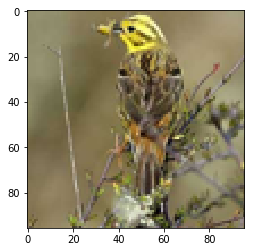

In [171]:
img = image_sample.astype('int')
plt.imshow(img, cmap="gray")
plt.show()

In [172]:
training = graph.get_tensor_by_name("Placeholder:0")

In [188]:
G, f= sess.run([grads[2], xs], feed_dict={X:image_sample_feed, training:False})
G = G[0]

In [189]:
alpha = G.mean(axis=(0,1,2))

In [190]:
f.shape, alpha.shape

((1, 16, 16, 128), (128,))

In [211]:
L = f * alpha

In [212]:
print(L.shape)
print(L.max(), L.min())
d = L.max() - L.min()

(1, 16, 16, 128)
0.03015028 -0.024352431


In [213]:
L_grad_cam = L.sum(axis=(0,3))
print(L_grad_cam.shape)

(16, 16)


In [214]:
import numpy as np
L_grad_cam = np.maximum(L_grad_cam, 0)

In [215]:
L_grad_cam = L_grad_cam / d * 255

In [216]:
L_grad_cam = L_grad_cam.astype('int')

In [217]:
L_grad_cam.shape

(16, 16)

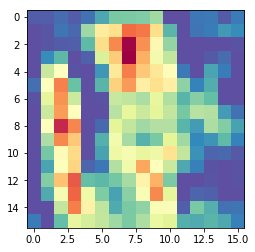

In [220]:
plt.imshow(-L_grad_cam, cmap="Spectral")

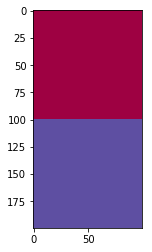

In [219]:
plt.imshow(np.vstack([np.zeros((100,100), dtype='int'),np.zeros((100,100), dtype='int')+255]), cmap='Spectral')